In [1]:
# Reemove o arquivo com o banco de dados SQLite (caso exista)
import os
os.remove("teste.db") if os.path.exists("teste.db") else None

In [2]:
import sqlite3
import time
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
#criando uma conecção 
con = sqlite3.connect('teste.db')

In [4]:
#criando um cursor
cur = con.cursor()

In [5]:
# Função para criar uma tabela
def create_table():
    cur.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
# Função para inserir uma linha
def data_insert():
    cur.execute("INSERT INTO produtos VALUES(10, '2020-05-02 14:32:11', 'Teclado', 90 )")
    con.commit()
    

    


In [6]:
#Criar tabela 
create_table()

In [7]:
#Inserir dados
data_insert()

In [16]:
# Usando variáveis para inserir dados    
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    cur.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", (new_date, new_prod_name, new_valor))
    con.commit()
    
# Gerando valores e inserindo na tabela
for i in range(10):
    data_insert_var()
    time.sleep(1)
    
    # Leitura de dados
def leitura_todos_dados():
    cur.execute("SELECT * FROM PRODUTOS")
    for linha in cur.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    cur.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in cur.fetchall():
        print(linha)      
        
# Leitura de colunas específicos
def leitura_colunas():
    cur.execute("SELECT * FROM PRODUTOS")
    for linha in cur.fetchall():
        print(linha[3]) 
        
# Gerar gráfico com os dados no banco de dados
def dados_grafico():
    cur.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = cur.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()





In [9]:
leitura_todos_dados()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(11, '2021-09-21 15:27:52.541996', 'Monitor', 52.0)
(12, '2021-09-21 15:27:53.729389', 'Monitor', 82.0)
(13, '2021-09-21 15:27:54.811546', 'Monitor', 78.0)
(14, '2021-09-21 15:27:55.882202', 'Monitor', 71.0)
(15, '2021-09-21 15:27:56.951834', 'Monitor', 60.0)
(16, '2021-09-21 15:27:58.013593', 'Monitor', 93.0)
(17, '2021-09-21 15:27:59.085523', 'Monitor', 58.0)
(18, '2021-09-21 15:28:00.172406', 'Monitor', 90.0)
(19, '2021-09-21 15:28:01.251553', 'Monitor', 95.0)
(20, '2021-09-21 15:28:02.317486', 'Monitor', 53.0)


In [10]:
leitura_registros()

(10, '2020-05-02 14:32:11', 'Teclado', 90.0)
(12, '2021-09-21 15:27:53.729389', 'Monitor', 82.0)
(13, '2021-09-21 15:27:54.811546', 'Monitor', 78.0)
(14, '2021-09-21 15:27:55.882202', 'Monitor', 71.0)
(16, '2021-09-21 15:27:58.013593', 'Monitor', 93.0)
(18, '2021-09-21 15:28:00.172406', 'Monitor', 90.0)
(19, '2021-09-21 15:28:01.251553', 'Monitor', 95.0)


In [11]:
leitura_colunas()

90.0
52.0
82.0
78.0
71.0
60.0
93.0
58.0
90.0
95.0
53.0


<IPython.core.display.Javascript object>


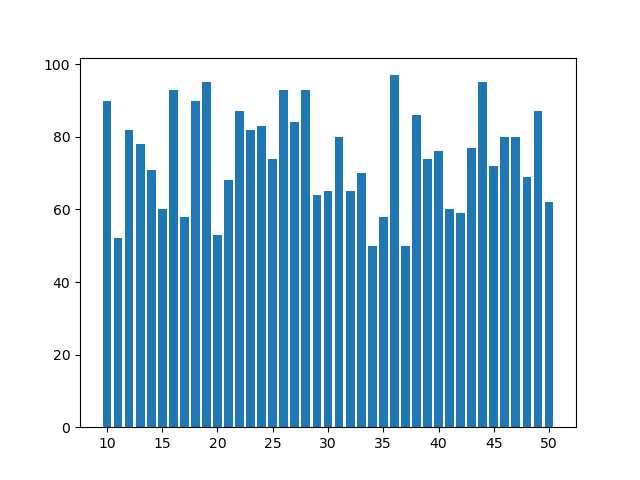

In [17]:
dados_grafico()